# ADS Homework #2 - Answer Key
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, September 24, strictly labeling the assignments with the format **'ADS_HW2_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours at Silver Hall, in Room 410 on Mondays from 9am-12am.

### Problem 1 - PM 2.5 Concentration in Beijing (50 points)

**What is a PM2.5?**<br>
“Particulate matter” (PM) is the general term used for a mixture of solid particles and liquid droplets
found in the air. The '2.5' specifies particles with aerodynamic diameters less than or equal to 2.5 microns (μm). This is very small - to put in in perspective, it would take about 30 of these, lined up next to each other, to cover the width of a human hair. They result from a variety of activities, including power plants, motor vehicles, airplanes, residential wood burning, forest fires, agricultural burning, volcanic eruptions (hopefully not something to worry about in NYC) and dust storms.<br>
**Why is this important to cities?**<br>
An extensive body of scientific evidence shows that short- or long-term exposures to fine particles
can cause adverse cardiovascular effects, including heart attacks and strokes resulting in
hospitalizations and, in some cases, premature death. A number of studies have also linked fine
particle exposures to respiratory effects, including the exacerbation of asthma and other respiratory
illnesses (short-term exposures) and the impairment of lung development (long-term exposures). In short, PM2.5 poses public health risks, and is something which cities should be knowledgeable about; predicting when PM2.5 concentration will be particularly high could allow the city to issue warnings or place restrictions on certain activities (e.g. driving, industrial activity, etc.).<br>
**The Data**<br>
We will be looking specifically at Beijing from 2010-2014, using a variety of weather-related variables. Although there exists a time component, and other data sources could be merged to look for additional factors (this could be a great final project - think traffic data, air-taffic data, industrial activity, etc), we will specifically focused on weather for the purposes of this assignment. Please load and take a look at the data below. 

In [8]:
# load libraries; read in data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
%matplotlib inline

beijing_pm = pd.read_csv('../data/Beijing_PM2.5.csv')
beijing_pm.head(3)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0


#### Description of Data

The data can be found, along with descriptions, at the following source: http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

**Attribute Information:**<br>
**No:** row number <br>
**year:** year of data in this row <br>
**month:** month of data in this row <br>
**day:** day of data in this row <br>
**hour:** hour of data in this row <br>
**pm2.5:** PM2.5 concentration (ug/m^3) <br>
**DEWP:** Dew Point (â„ƒ) <br>
**TEMP:** Temperature (â„ƒ) <br>
**PRES:** Pressure (hPa) <br>
**cbwd:** Combined wind direction <br>
**Iws:** Cumulated wind speed (m/s) <br>
**Is:** Cumulated hours of snow <br>
**Ir:** Cumulated hours of rain <br>

**1.1)** Data cleaning: As you can see, there are some *n/a* values in our dataframe that need to be removed. Do so, and while you're at it, remove any columns specifying date or time and the wind direction column, as we will not be using these in our analysis. Additionally, decimals should not be used in column names, as this can create problems further down the road - rename 'PM2.5' to simply 'PM25'. (The data are also messy in that the 'I' (i) in the last three columns is indistiguishable from a lower-case 'l' (L) in python's font. Please feel free to rename these to your choosing, however this is not required.) Show the first 5 rows of the cleaned dataset below, then print a descriptive table of the dataset (mean, stdev, etc). **(5 points)**

In [9]:
# cleaning done appropriately: 4pts (broken down as below)
# print description: 1pt

beijing_pm.dropna(inplace=True) # 1pt
beijing_pm.drop(['No', 'year', 'month', 'day', 'hour', 'cbwd'], axis=1, inplace=True) #2pts
beijing_pm.rename({'pm2.5':'pm25'}, axis=1, inplace=True)  #1pt
beijing_pm.head()

,pm25,DEWP,TEMP,PRES,Iws,Is,Ir
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0


In [10]:
beijing_pm.describe()

,pm25,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


**1.2)** Take an initial look at the correlations among the variables to get a better intuition for the data. Plot the correlations in a heatmap table using the Seaborn library with the 'seismic' colormap (this provides for clearer visualization, and lets important values "jump out" at you more immediately - it is also comes across as less-scary when showing to non-data scientists). Try to adjust the figure-size so that it is not too compressed. Please include a brief summary of your observations.  **(5 points)**

[]

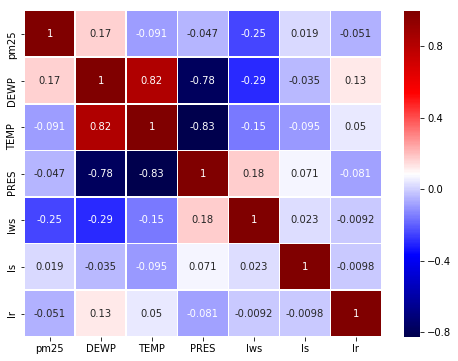

In [11]:
# get the correlation: 2pts
# plot the heatmap: 3pts (labels are great, but not required)

pm_corr = beijing_pm.corr()
fig = plt.figure(figsize=(8,6))
sns.heatmap(pm_corr, cmap='seismic', linewidths=0.5, annot=True)
plt.plot()

**Summary:**

**1.3)** Using the independant variable with the strongest correlation (note: 'strong' is defined by absolute value) to PM2.5 concentration, run a single variable regression. Print the results, and write a brief interpretation of the R-squared. **(10 points)**

In [12]:
# Regression run correctly: 5pts
# interpretation: 5pts

mod = smf.ols(formula='pm25 ~ Iws', data = beijing_pm).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2731.
Date:                Fri, 19 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:07:45   Log-Likelihood:            -2.4677e+05
No. Observations:               41757   AIC:                         4.935e+05
Df Residuals:                   41755   BIC:                         4.936e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.5845      0.484    226.280      0.0

**Summary:**

**1.4)** Now fit the regression with all of the independant variables. How does the R_squared change? What does this mean? How might colinearity impact our model? **(12 points)**

In [13]:
# regression: 5pts
# discussion on R_squared: 4pts
# discussion on colinearity: 3pts

mod1 = smf.ols(formula='pm25 ~ DEWP + TEMP + PRES + Iws + Is + Ir', data = beijing_pm).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2151.
Date:                Fri, 19 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:07:48   Log-Likelihood:            -2.4247e+05
No. Observations:               41757   AIC:                         4.849e+05
Df Residuals:                   41750   BIC:                         4.850e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1728.4313     72.990     23.680      0.0

**Summary:**

**1.5)** Run another regression on the data, this time removing the "DEWP" and "PRES" independant variables. What happens to the coefficients for the remaining variables? Why might this be the case? (Hint: look at your correlation table above) **(12 points)**

In [14]:
# regression: 5pts
# discussion: 7pts (feel free to give partial credit here - key point is that TEMP is highly correlated with the dropped values)

mod2 = smf.ols(formula='pm25 ~ TEMP + Iws + Is + Ir', data = beijing_pm).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     913.4
Date:                Fri, 19 Oct 2018   Prob (F-statistic):               0.00
Time:                        13:07:49   Log-Likelihood:            -2.4634e+05
No. Observations:               41757   AIC:                         4.927e+05
Df Residuals:                   41752   BIC:                         4.927e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    122.8806      0.681    180.543      0.0

**Summary:**

**1.6)** Calculate (either in python or by hand) the impact of a one standard deviation increase in *temperature* and a one standard deviation increase in *cumulative wind speed* for the models in **1.4** & **1.5**. **(6 points)**

In [25]:
# correct approach: 2pts (if they do it by hand... tough to tell - I guess answers are key then)
# correct response: 1pt each

temp_mod1 = mod1.params['TEMP'] * beijing_pm.TEMP.std()
temp_mod2 = mod2.params['TEMP'] * beijing_pm.TEMP.std()

iws_mod1 = mod1.params['Iws'] * beijing_pm.Iws.std()
iws_mod2 = mod2.params['Iws'] * beijing_pm.Iws.std()

print('Temp model 1:', temp_mod1)
print('Temp model 2:', temp_mod2)
print('Wind model 1:', iws_mod1)
print('Wind model 2:', iws_mod1)

Temp model 1: -73.8804366989551
Temp model 2: -11.689757802286637
Wind model 1: -12.981994015608239
Wind model 2: -12.981994015608239


Answers:

### Problem 2 - Polynomial Regression (30 points)

In [26]:
# let's create some artificial data
y  = [2.61338821976, 2.17035124741, 0.0495462311938, 1.15825768821, 1.39756687454, 1.77323953196]
x1 = [-0.5, -0.32, -0.14, 0.04, 0.22, 0.4]
df = pd.DataFrame(data=[y, x1], index=(['y', 'x1'])).T
df.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


**2.1)** Draw a scatter plot of the data (no lines required). Does there seem to be an apparent line of best fit? **(5 points)**

Text(0.5,0,'x1')

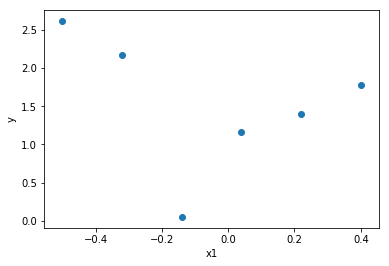

In [27]:
# plot: 2pts
# discussion: 3pts

plt.scatter(df.x1, df.y)
plt.ylabel('y')
plt.xlabel('x1')

**Summary:**

**2.2)** Our dependant variable *y*, in this case, does not appear to be a linear function of *x*. Create new columns in the dataframe for $x^2$, $x^3$, and $x^4$. **(5 points)**

In [10]:
# 5pts for this... give partial if they try. 2pts off for it not being in a dataframe (in case they did list or numpy)

df['x2'] = df.x1 ** 2
df['x3'] = df.x1 ** 3
df['x4'] = df.x1 ** 4
df

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


**2.3)** For each of our polynomials (*x1, x2, x3, x4*), fit a model to *y*. Store and report the R-squared and parameters for each polynomial. Plot the R-squared values in a bar chart to see how they change with the polynomials. Which polynomial seems to be the best fit? Describe why this might be the case. **(10 points)**

In [11]:
# 4pts for storing the values (they don't have to be in a dataframe for this one)
# 4pts for the bar chart
# 2pts for discussion

lm_x1 = smf.ols('y ~ x1',data=df).fit()
lm_x2 = smf.ols('y ~ x2',data=df).fit()
lm_x3 = smf.ols('y ~ x3',data=df).fit()
lm_x4 = smf.ols('y ~ x4',data=df).fit()

models = [lm_x1, lm_x2, lm_x3, lm_x4]
model_names = ['lm_x1','lm_x2', 'lm_x3', 'lm_x4']
intercept = []
slope = []
r_squared = []

for mod in models:
    intercept.append(mod.params[0])
    slope.append(mod.params[1])
    r_squared.append(mod.rsquared)
    
Params = {'models':model_names,
          'intercept':intercept,
          'slope':slope,
          'r_squared':r_squared}
Params = pd.DataFrame.from_dict(Params)
Params = Params[['models', 'intercept', 'slope', 'r_squared']]
Params

,models,intercept,slope,r_squared
0,lm_x1,1.484119,-0.858791,0.104796
1,lm_x2,0.789677,7.601874,0.649677
2,lm_x3,1.426492,-7.032617,0.244027
3,lm_x4,1.071264,26.992720,0.541640


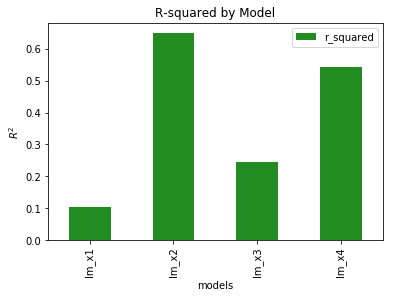

In [12]:
ax = Params.plot(kind='bar',y='r_squared', x='models', color='forestgreen')
ax.set_ylabel('$R^2$')
ax.set_title('R-squared by Model')
plt.show()

**2.4)** Plot a figure with 4 subfigures, one for each polynomial degree. In each subfigure:<br>
a) Draw the original scatter plot<br>
b) Plot the curve of the true function $f(x) = 9x^2 - x + 1$ (use np.linspace to create a line)<br>
c) Plot your fitted curve for each degree. Observe how our model fits the data as the degree changes.<br>
d) Having done this exercise, why might adding polynomials to our data be useful? What conclusions can we draw from fitting the four polynomials? **(10 points)**

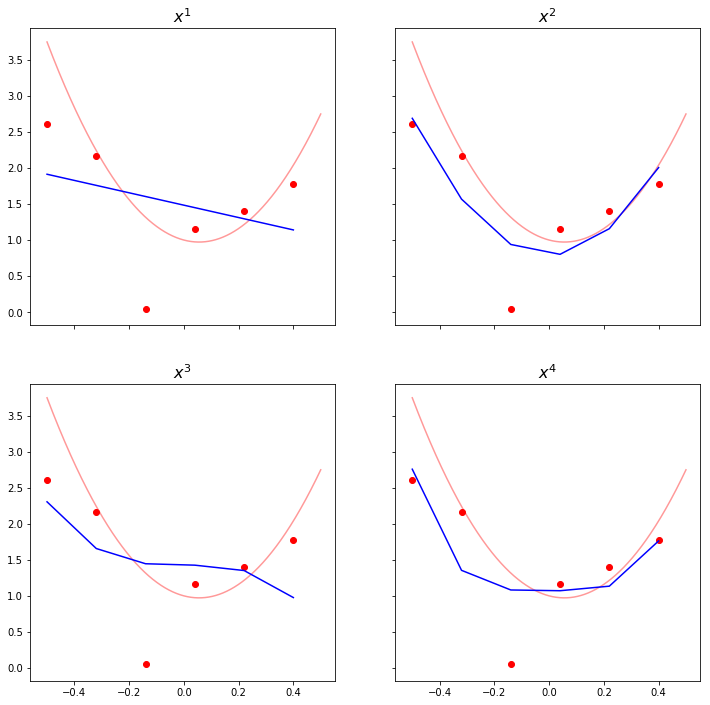

In [13]:
# a - 2pts, b - 2pts, c - 4pts, d - 2pts

fig, ax = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,12))

x = np.linspace(-0.5,0.5,1000)
y = 9 * x**2 - x + 1

x_pred = np.array(df['x1'])
y_pred1=lm_x1.predict()
y_pred2=lm_x2.predict()
y_pred3=lm_x3.predict()
y_pred4=lm_x4.predict()

ax[0, 0].plot(x,y,color='red', alpha=0.4)
ax[0, 0].scatter(x=df['x1'],y=df['y'], color='red')
ax[0, 0].plot(x_pred, y_pred1, color='b')
ax[0, 0].set_title('$x^1$', fontsize=16)

ax[0, 1].plot(x,y,color='red', alpha=0.4)
ax[0, 1].scatter(x=df['x1'],y=df['y'], color='red')
ax[0, 1].plot(x_pred, y_pred2, color='b')
ax[0, 1].set_title('$x^2$', fontsize=16)

ax[1, 0].plot(x,y,color='red', alpha=0.4)
ax[1, 0].scatter(x=df['x1'],y=df['y'], color='red')
ax[1, 0].plot(x_pred, y_pred3, color='b')
ax[1, 0].set_title('$x^3$', fontsize=16)

ax[1, 1].plot(x,y,color='red', alpha=0.4)
ax[1, 1].scatter(x=df['x1'],y=df['y'], color='red')
ax[1, 1].plot(x_pred, y_pred4, color='b')
ax[1, 1].set_title('$x^4$', fontsize=16)

plt.show()

### Problem 3 - Intro to Normalization (20 points)

This final problem is a brief exercise to explore the effects of normalization. We will be using household data from California, which was derived from the 1990 census. (https://www.kaggle.com/camnugent/california-housing-prices)

In [4]:
housing = pd.read_csv('../data/housing.csv')
housing = housing[['median_income', 'median_house_value']][0:50]
housing.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


**3.1)** Are there any immediately obvious trends between our two variables? Sort the values by *median_house_value*, then plot the data. Write a brief description of what you see (or, more likely, what you don't see, and why that might be the case). **(10 points)**

In [5]:
# correctly sort values: 2pts
# plot - 6pts (feel free to give partial)
# interpretation: 2pts

housing = housing.sort_values('median_house_value').reset_index(drop=True)
housing

,median_income,median_house_value
0,2.4597,93800.0
1,1.4861,97200.0
2,2.1806,99700.0
3,1.4103,103900.0
4,1.0972,104500.0
5,1.3750,104900.0
6,1.8080,105500.0
7,2.4038,107500.0
8,1.6424,108900.0
9,2.7303,109700.0


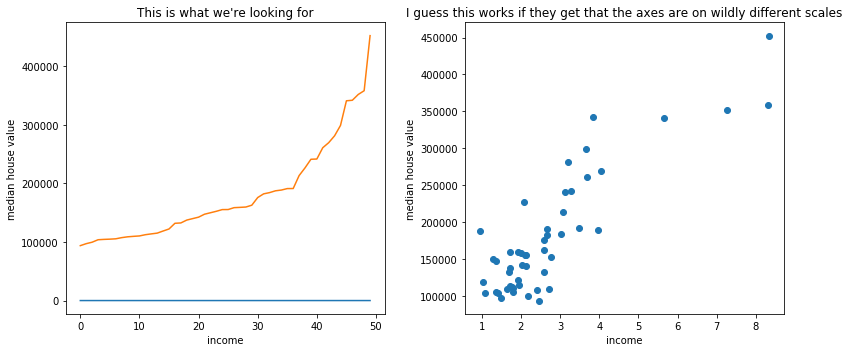

In [32]:
housing = housing.sort_values('median_house_value').reset_index(drop=True)

fig, (good, mehhh_okay_i_guess) = plt.subplots(1, 2, figsize=(12, 5))

good.plot(housing)
good.set_title('This is what we\'re looking for')
good.set_ylabel('median house value')
good.set_xlabel('income')

mehhh_okay_i_guess.scatter(housing.median_income, housing.median_house_value)
mehhh_okay_i_guess.set_title('I guess this works if they get that the axes are on wildly different scales')
mehhh_okay_i_guess.set_ylabel('median house value')
mehhh_okay_i_guess.set_xlabel('income')

plt.tight_layout()
plt.show()

**Summary:**

**3.2)** Orthonormalize the data so that the *mean* is 0 and the *st_dev* is 1. Write this as a python function that can be fed a dataframe and return an orthonormalized version (this should take no more than 4 lines of code). Plot an orthonormalized version of the housing data that you now have. Write a brief description of how it looks different than in *3.1* and ellaborate breifly on why and in what situations orthonormalization can be useful. **(10 points)**

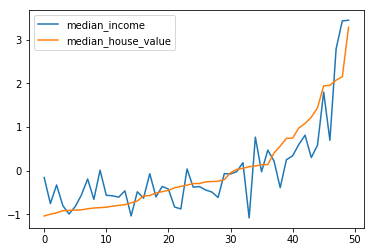

In [42]:
# they create a function: 2pts
# data normalized correctly: 3pts
# plot (again, it can be a scatter, as above): 3pts
# interpritation: 2pts

def ortho_norm(df):
    for col in df.columns:
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df

ortho_norm(housing).plot()

**Summary:**